# Estatística Descritiva 

**Vamos usar uma base do Ifood para exemplificar a Análise Exploratória dos Dados (EDA)**


### Descrição das Colunas do DataFrame

* **`availableForScheduling`**: Indica se o estabelecimento permite o agendamento de pedidos.
* **`avatar`**: URL ou identificador da imagem do perfil/avatar do estabelecimento.
* **`category`**: A categoria culinária do estabelecimento (ex: "Japonesa", "Pizza").
* **`delivery_fee`**: O valor da taxa de entrega cobrada pelo estabelecimento.
* **`delivery_time`**: O tempo estimado de entrega em minutos.
* **`distance`**: A distância (provavelmente em quilômetros ou metros) entre o ponto de entrega e o estabelecimento.
* **`ibge`**: O código IBGE da localidade associada ao estabelecimento ou pedido.
* **`minimumOrderValue`**: O valor mínimo que o pedido deve ter para ser aceito.
* **`name`**: O nome do estabelecimento.
* **`paymentCodes`**: Tipos ou códigos de pagamento aceitos pelo estabelecimento.
* **`price_range`**: A faixa de preço do estabelecimento (ex: "$", "$$", "$$$").
* **`rating`**: A avaliação média do estabelecimento pelos clientes.
* **`tags`**: Descritores adicionais ou palavras-chave associadas ao estabelecimento.
* **`url`**: A URL direta para a página do estabelecimento no iFood.

**Setup**

In [1]:
#Data Wranling 
import numpy as np 
import pandas as pd 

#Data Visualization
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
#Padronizando as visualizações
sns.set_theme(
    style="whitegrid",       # Estilo do fundo e da grade  
    font_scale=1.1,          # Escala da fonte 
    rc={
        'figure.figsize': (8, 6),       # Tamanho padrão das figuras
        'axes.titlesize': 16,            # Tamanho do título do gráfico
        'axes.titleweight': 'bold',      # Título do gráfico em negrito
        'axes.labelsize': 12,            # Tamanho dos rótulos dos eixos
        'axes.labelweight': 'bold',      # Rótulos dos eixos em negrito
        'xtick.labelsize': 10,           # Tamanho dos rótulos do eixo X (os números/categorias)
        'ytick.labelsize': 10,           # Tamanho dos rótulos do eixo Y (os números)
        'legend.fontsize': 10,           # Tamanho da fonte da legenda
        'lines.linewidth': 2,            # Largura padrão das linhas
        'axes.formatter.useoffset': False, # Evita notação científica para pequenos números
        'axes.formatter.limits': (-4, 4)   # Controla quando usar notação científica
    }
)

Carregando dados

In [3]:
#Load data
df = pd.read_csv('ifood-restaurants-february-2021.csv')

In [5]:
#Infos gerais
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 406399 entries, 0 to 406398
Data columns (total 14 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   availableForScheduling  406399 non-null  bool   
 1   avatar                  406122 non-null  object 
 2   category                406399 non-null  object 
 3   delivery_fee            406399 non-null  float64
 4   delivery_time           406399 non-null  int64  
 5   distance                406399 non-null  float64
 6   ibge                    406399 non-null  int64  
 7   minimumOrderValue       406399 non-null  float64
 8   name                    406399 non-null  object 
 9   paymentCodes            406397 non-null  object 
 10  price_range             406399 non-null  object 
 11  rating                  406399 non-null  float64
 12  tags                    406399 non-null  object 
 13  url                     406399 non-null  object 
dtypes: bool(1), float64(

Como nosso conjunto de dados possue algumas colunas desnecessárias para nossa análise descritiva, vamos seguir apenas com algumas delas.


### Selecionando variáveis

In [6]:
#New data
df = df[["availableForScheduling",
             "category",
             "delivery_fee",
             "delivery_time",
             "distance",
             "price_range",
             "minimumOrderValue",
             "rating"
             ]]
    

In [7]:
#Primeiras linhas
df.head(5)

,availableForScheduling,category,delivery_fee,delivery_time,distance,price_range,minimumOrderValue,rating
0,False,Marmita,3.99,27,1.22,CHEAPEST,10.0,0.0
1,False,Açaí,7.99,61,4.96,CHEAPEST,10.0,0.0
2,False,Bebidas,11.99,70,8.35,MODERATE,5.0,0.0
3,False,Carnes,16.49,63,6.35,CHEAPEST,20.0,0.0
4,False,Brasileira,11.99,58,5.22,CHEAPEST,20.0,0.0


In [8]:
#Dimensão dos dados
df.shape

(406399, 8)

In [9]:
#Tipos de dados
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 406399 entries, 0 to 406398
Data columns (total 8 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   availableForScheduling  406399 non-null  bool   
 1   category                406399 non-null  object 
 2   delivery_fee            406399 non-null  float64
 3   delivery_time           406399 non-null  int64  
 4   distance                406399 non-null  float64
 5   price_range             406399 non-null  object 
 6   minimumOrderValue       406399 non-null  float64
 7   rating                  406399 non-null  float64
dtypes: bool(1), float64(4), int64(1), object(2)
memory usage: 22.1+ MB


In [10]:
#Verficando novamente nulos
df.isnull().sum()

availableForScheduling    0
category                  0
delivery_fee              0
delivery_time             0
distance                  0
price_range               0
minimumOrderValue         0
rating                    0
dtype: int64

In [11]:
#Verificando dados duplicados 
for col in df.columns:
    print(f'{col}:', df[col].nunique(), 'valores únicos/duplicados')

availableForScheduling: 2 valores únicos/duplicados


category: 61 valores únicos/duplicados
delivery_fee: 406 valores únicos/duplicados
delivery_time: 190 valores únicos/duplicados
distance: 1770 valores únicos/duplicados
price_range: 5 valores únicos/duplicados
minimumOrderValue: 595 valores únicos/duplicados
rating: 22471 valores únicos/duplicados


No nosso contexto, é normal ter dados duplicados em algumas colunas do noss odataset, então optamos por não remove-los.

In [12]:
#Selecionando dados numéricos e categoricos 
cat_cols = df.select_dtypes(include=['object','category','bool'])

num_cols = df.select_dtypes(include='number')


# //Análise Univariada**

### Medidas de tendencia central

In [13]:
#Média e mediana 
for col in num_cols:
    print(f'Média de {col}:', round(df[col].mean(),2))
    print(f'Mediana de {col}:', round(df[col].median(),2))

Média de delivery_fee: 6.8
Mediana de delivery_fee: 6.0
Média de delivery_time: 47.43
Mediana de delivery_time: 45.0
Média de distance: 4.22
Mediana de distance: 3.08
Média de minimumOrderValue: 276.89
Mediana de minimumOrderValue: 15.0
Média de rating: 2.52
Mediana de rating: 3.96


In [14]:
#Valores máximos e minimos (amplitude)
for col in num_cols:
    print(f'Valor máximo de {col} :', round(df[col].max(),2))
    print(f'Valor mínimo de {col}:', df[col].min())

Valor máximo de delivery_fee : 35.0
Valor mínimo de delivery_fee: 0.0
Valor máximo de delivery_time : 5050
Valor mínimo de delivery_time: -1
Valor máximo de distance : 11810.19
Valor mínimo de distance: 0.0
Valor máximo de minimumOrderValue : 99999999.99
Valor mínimo de minimumOrderValue: 0.0
Valor máximo de rating : 5.0
Valor mínimo de rating: 0.0


In [15]:
#Medidas de tendencia central
num_cols.describe()

,delivery_fee,delivery_time,distance,minimumOrderValue,rating
count,406399.000000,406399.000000,406399.000000,4.063990e+05,406399.000000
mean,6.804577,47.432747,4.219752,2.768909e+02,2.522241
std,4.315815,19.662736,68.329379,1.570668e+05,2.286103
min,0.000000,-1.000000,0.000000,0.000000e+00,0.000000
25%,4.000000,35.000000,1.750000,1.000000e+01,0.000000
50%,6.000000,45.000000,3.080000,1.500000e+01,3.958900
75%,9.490000,60.000000,4.830000,2.000000e+01,4.718750
max,35.000000,5050.000000,11810.190000,1.000000e+08,5.000000


Insights: 

**Taxa de Entrega (delivery_fee):**

- Variabilidade Considerável: As taxas de entrega variam bastante. Embora a média seja R$ 6.80, o desvio padrão de R$ 4.31 mostra que os valores estão bem dispersos.

- Entrega Grátis: Algumas entregas têm taxa zero (R$ 0.00), o que pode indicar promoções ou ofertas de restaurantes.

- Outliers Raros: A maioria das entregas (75%) custa até R$ 9.49. No entanto, há casos extremos, como uma taxa de R$ 35.00, que merecem ser investigados, pois são bem incomuns


**Tempo de Entrega (delivery_time):**

- Valores Inconsistentes: Identificamos tempos de entrega negativos (-1 minuto), que são erros óbvios e precisam ser corrigidos.

- Outliers Extremos: Há um tempo máximo de entrega de 5050 minutos, o que é um erro claro ou um caso extremamente raro que distorce nossas análises. Isso também precisa ser tratado.

- Experiência Típica: Para a maioria dos pedidos, 50% das entregas são feitas em até 45 minutos, e 75% em até 1 hora.

**Valor Mínimo do Pedido (minimumOrderValue):**

- Presença de "Zero": Alguns restaurantes permitem pedidos sem valor mínimo (R$ 0.00).

- Concentração em Valores Baixos: A maioria dos restaurantes (75%) exige um valor mínimo de pedido de até R$ 20.00.

- Outlier muito discrepante: Existe um valor mínimo de pedido de R$ 100.000.000,00 (cem milhões de reais), que é um erro de dados gritante e precisa ser removido ou corrigido, pois distorce completamente todas as estatísticas para esta coluna.


In [16]:
#Valor mais presente em categorias 
for col in cat_cols:
    print(f'Moda de {col} :', df[col].mode()[0])

Moda de availableForScheduling : False
Moda de category : Lanches
Moda de price_range : CHEAPEST


### Medidas de variança e dispersão

**Boxplots**

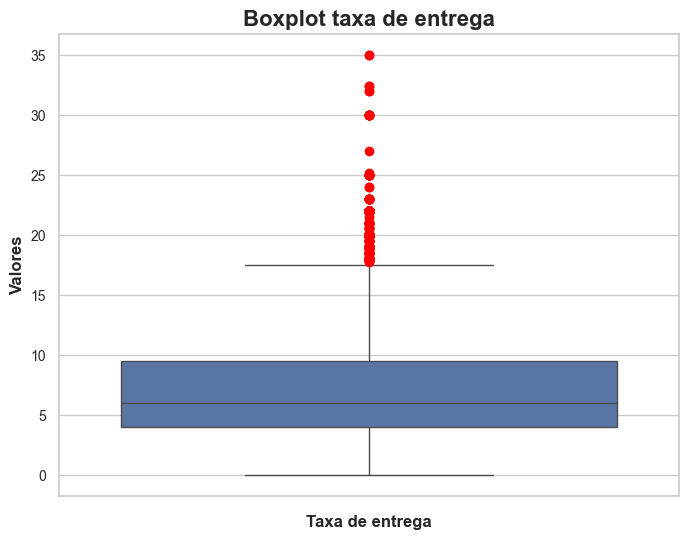

In [17]:
#Delivery fee
sns.boxplot(df['delivery_fee'], 
            flierprops= dict(marker='o', markerfacecolor='red', markeredgecolor='red'))

#Titulos e eixos 
plt.title('Boxplot taxa de entrega')
plt.xlabel('Taxa de entrega')
plt.ylabel('Valores')
plt.show()

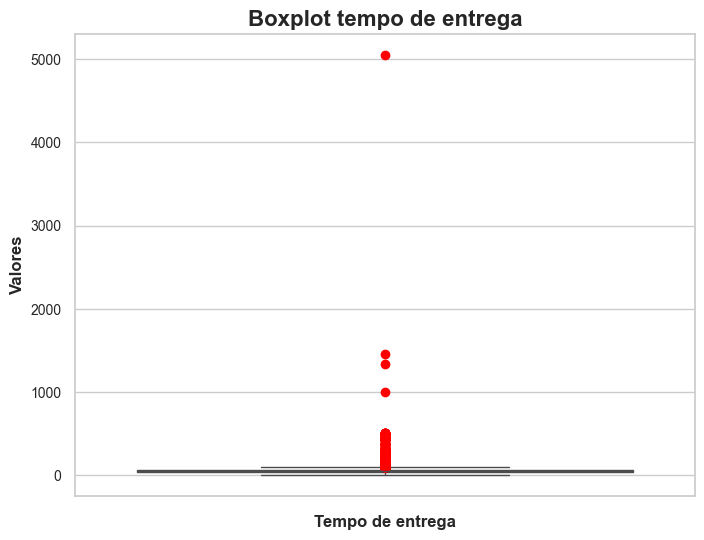

In [18]:
#Delivery time
sns.boxplot(df['delivery_time'], 
            flierprops= dict(marker='o', markerfacecolor='red', markeredgecolor='red'))

#Titulos e eixos 
plt.title('Boxplot tempo de entrega')
plt.xlabel('Tempo de entrega')
plt.ylabel('Valores')
plt.show()

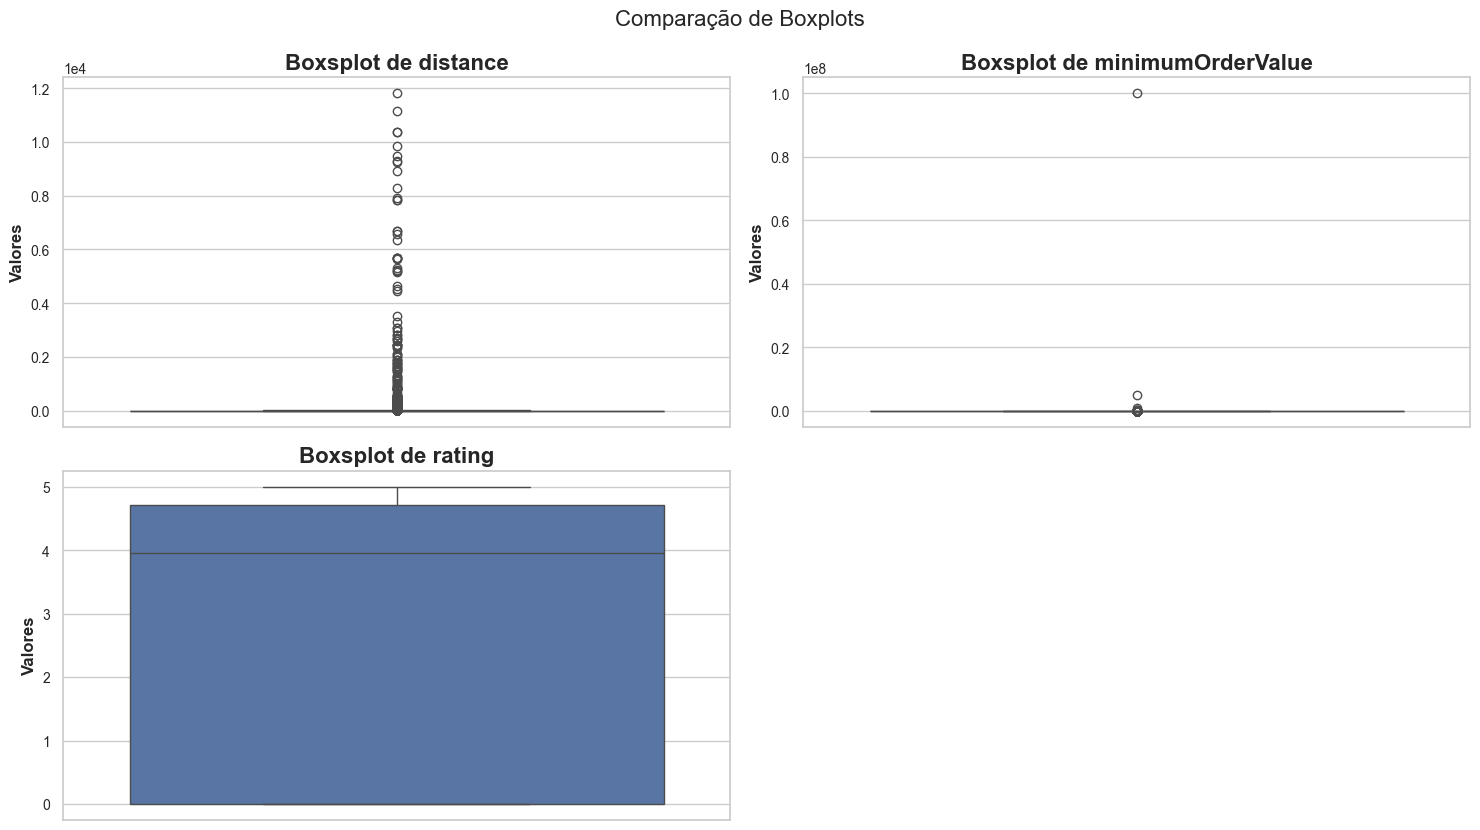

In [19]:
#Definindo o subplots das outras variáveis
fig, axes = plt.subplots(nrows= 3, ncols= 2, figsize=(15,12))
axes = axes.flatten()

#Variveis
num = ['distance','minimumOrderValue','rating']

#Loop para criar cada subplot
for index, col in enumerate(num):
    if index < len(axes):
        sns.boxplot(y = df[col], ax = axes[index]) #Usa y para boxplots verticais
        axes[index].set_title(f'Boxsplot de {col}')
        axes[index].set_ylabel(f'Valores')
        axes[index].set_xlabel('') #Remove o rótulo do eixo x

#Esconder subplots vazios
for j in range(index + 1, len(axes)):
    fig.delaxes(axes[j])

#Definindo titulo    
plt.tight_layout() 
plt.suptitle('Comparação de Boxplots', y=1.02, fontsize=16) 
plt.show()


Análise: 

- Com a visualização de boxplots, conseguimos ter a certeza que existem muitos outliers (valores discrepantes) nas variáveis 
taxa,tempo de entrega, distancia e valor minimo de pedido. Com isso iremos optar por remove-los para análises mais precisas.



**Tratando Outliers**

In [20]:
#Quartis e IQR de 'delivery_time'
Q1_time = df['delivery_time'].quantile(0.25)
Q3_time = df['delivery_time'].quantile(0.75)
IQR_time = Q3_time - Q1_time
lower_time = Q1_time - 1.5 * IQR_time
upper_time = Q3_time + 1.5 * IQR_time

#Mask de outliers para delivery_time
is_outlier_time = (df['delivery_time'] < lower_time) | (df['delivery_time'] > upper_time)
print(f"Linhas com outlier em 'delivery_time': {is_outlier_time.sum()}")

Linhas com outlier em 'delivery_time': 3857


In [21]:
#Quartis e IQR de 'delivery_fee'
Q1_fee = df['delivery_fee'].quantile(0.25)
Q3_fee = df['delivery_fee'].quantile(0.75)
IQR_fee = Q3_fee - Q1_fee
lower_fee = Q1_fee - 1.5 * IQR_fee
upper_fee = Q3_fee + 1.5 * IQR_fee

#Mask de outliers de delivery_fee
is_outlier_fee = (df['delivery_fee'] < lower_fee) | (df['delivery_fee'] > upper_fee)
print(f"Linhas com outlier em 'delivery_fee': {is_outlier_fee.sum()}")

Linhas com outlier em 'delivery_fee': 2023


In [22]:
#Quartis e IQR's de 'distance' e 'minimumOrderValue' combinadas
distance_minimum_cols = ['distance', 'minimumOrderValue']
Q1_dist_min = df[distance_minimum_cols].quantile(0.25)
Q3_dist_min = df[distance_minimum_cols].quantile(0.75)
IQR_dist_min = Q3_dist_min - Q1_dist_min
lower_dist_min = Q1_dist_min - 1.5 * IQR_dist_min
upper_dist_min = Q3_dist_min + 1.5 * IQR_dist_min

#DataFrame booleano para crias a mask (True se a célula é outlier)
is_outlier_in_dist_min = (df[distance_minimum_cols] < lower_dist_min) | \
                                 (df[distance_minimum_cols] > upper_dist_min)

#Mask de outlier para distance OU minimumOrderValue (True se a LINHA tiver qualquer outlier)
is_outlier_dist_min_combined = is_outlier_in_dist_min.any(axis=1)
print(f"Linhas com outlier em 'distance' OU 'minimumOrderValue': {is_outlier_dist_min_combined.sum()}")


Linhas com outlier em 'distance' OU 'minimumOrderValue': 10741


In [23]:
#Combinando todas as mask de outliers
final_combined_outlier_mask = is_outlier_time | is_outlier_fee | is_outlier_dist_min_combined

total_lines_with_any_outlier = final_combined_outlier_mask.sum()
print(f"\nTotal de linhas que possuem pelo menos um outlier (em qualquer das 4 colunas): {total_lines_with_any_outlier}")
print(f"Percentual de linhas que serão removidas: {np.round(100 * total_lines_with_any_outlier / len(df), 2)} %")


Total de linhas que possuem pelo menos um outlier (em qualquer das 4 colunas): 14725
Percentual de linhas que serão removidas: 3.62 %


In [24]:
#DF final sem os outliers (usando '~' p usar tudo o que que não é otlier) 
df_sem_out = df[~final_combined_outlier_mask].copy()

### Visualização sem Outliers

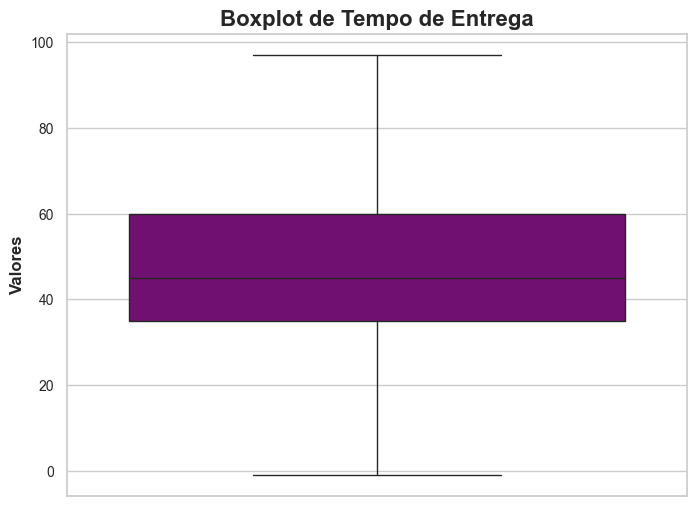

In [25]:
#Boxplot atualizado tempo de entrega
sns.boxplot(df_sem_out['delivery_time'], color = 'purple')
#Títulos e eixos 
plt.title('Boxplot de Tempo de Entrega')
plt.ylabel('Valores')
plt.show()



**Tempo de entrega**

- Mediana (metade) das entregas são feitas em torno de 45 minutos, ou seja, metade dos tempos de entrega estão abaixo e acima de 45 minutos.
- Entre 25% e 75% (amplitude interquartil) de todos nossos tempos de entrega estão em torno de 35 e 60 minutos. 
- Amplitude (tempo mínimo e máximo) entre 0 e 100 minutos.
- Como nosso IQR é em torno de 25 minutos e uma amplitude total de 100 minutos, podemos inferir que os tempos de entrega costumam
variar consideravelmente.

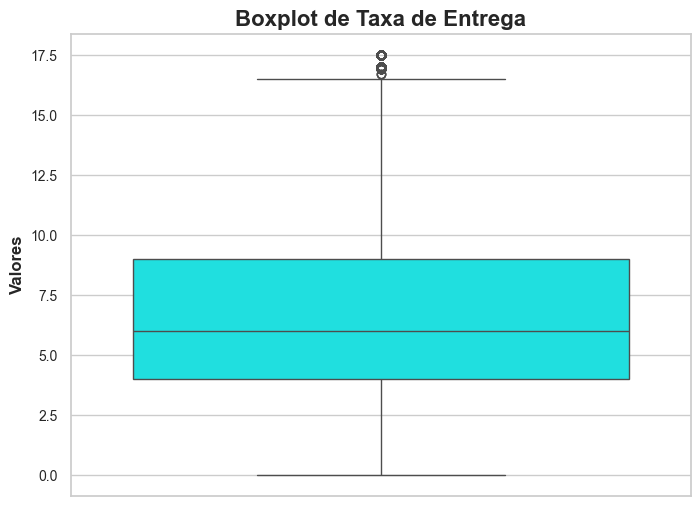

In [26]:
#Boxplot atualizado taxa de entrega
sns.boxplot(df_sem_out['delivery_fee'], color= 'cyan')
#Títulos e eixos 
plt.title('Boxplot de Taxa de Entrega')
plt.ylabel('Valores')
plt.show()

**Taxa de entrega**
- Mediana (metade) das taxas estão em torno de R$6,00 e R$6,50. 
- 25% e 75% das nossas taxas se concentram entre R$4,20 e R$9,00.
- A taxa mínima é de R$0,00 (entrega grátis) e a taxa máxima em torno de R$16,50.
- Como nosso IQR é em torno de R$4,80 e o máximo de R$16,50, podemos infefir que há alguma variança, mas não tão significativa.

C:\Users\Felipe\AppData\Local\Temp\ipykernel_11208\450385183.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(df_sem_out['distance'], palette= 'Set2')


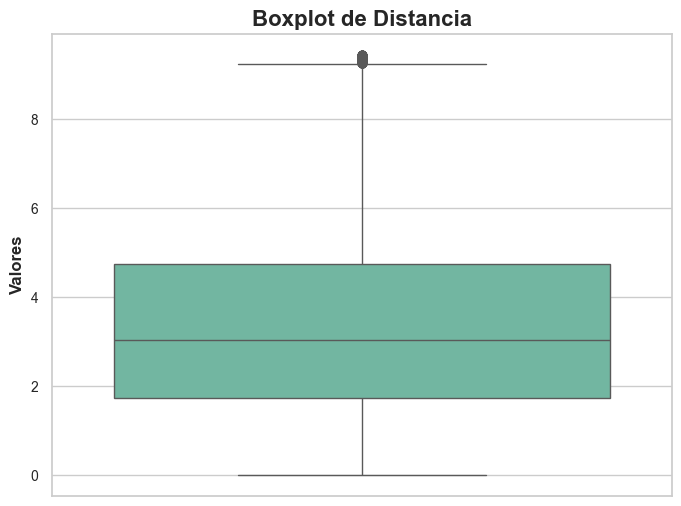

In [27]:
#Boxplot atualizado taxa de entrega
sns.boxplot(df_sem_out['distance'], palette= 'Set2')
#Títulos e eixos 
plt.title('Boxplot de Distancia')
plt.ylabel('Valores')
plt.show()

**Distancia**
- Mediana (metade) das taxas estão em torno de 3km. 
- 25% e 75% das nossas taxas se concentram entre 2km e 5km.
- A distancia mínimo é 0Km e a distancia máxima fica acima de 8km.
- Como nosso IQR é em torno de 2,8km e o máximo em torno de 9km, podemos infefir que há alguma variança, mas de forma não tão significativa.

C:\Users\Felipe\AppData\Local\Temp\ipykernel_11208\1736843876.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(df_sem_out['minimumOrderValue'], palette= 'Accent')


Text(0, 0.5, 'Valores')

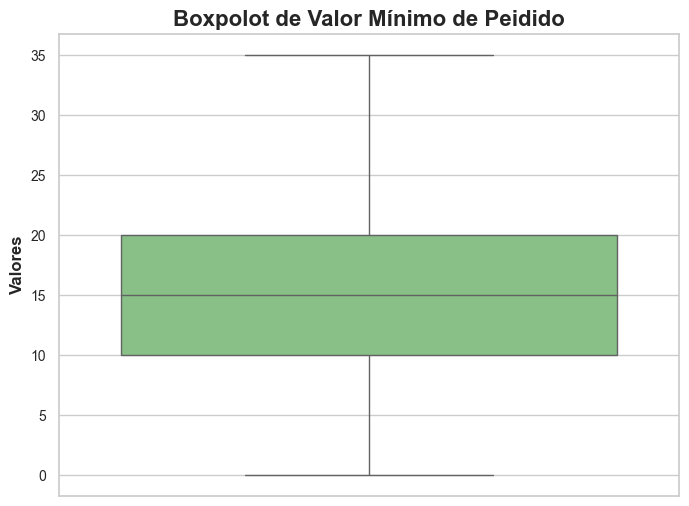

In [28]:
#Boxplot de Valor mínimo de pedido 
sns.boxplot(df_sem_out['minimumOrderValue'], palette= 'Accent')
plt.title('Boxpolot de Valor Mínimo de Peidido')
plt.ylabel('Valores')

**Valor Mínimo de Pedido**
- Mediana (metade) dos valores mínimos de pedidos estão em R$15,00. 
- 25% e 75% dos valores mínimos de pedidos estão entre R$ 10,00 e R$20,00.
- O valor mínimo de um pedido regitrado é de R$0,00 (sem valor mínimo) e o valor máximo de R$35,00.
- Como nosso IQR é em torno de R$ 10,00 e o máximo em torno de R$35,00 podemos infefir que há uma boa variança de forma signitificativa, apesar da maioria dos nossos dados ficarem entre R$10,00 e RS20,00.

C:\Users\Felipe\AppData\Local\Temp\ipykernel_11208\1070305467.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(df_sem_out['rating'], palette= 'colorblind')


Text(0, 0.5, 'Valores')

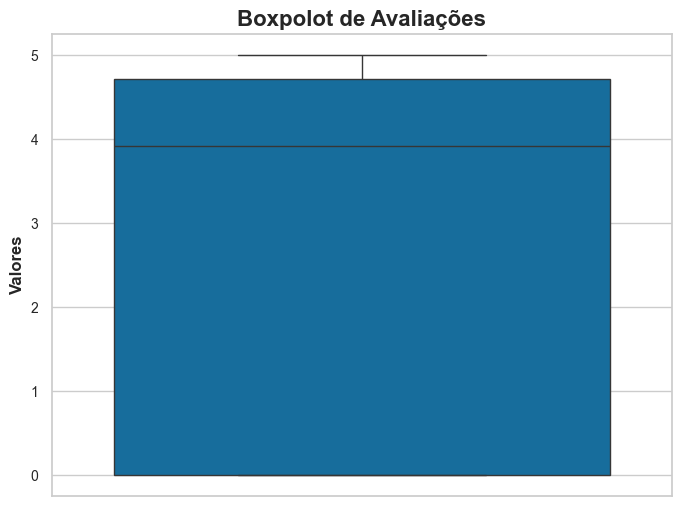

In [29]:
#Boxplot de Valor mínimo de pedido 
sns.boxplot(df_sem_out['rating'], palette= 'colorblind')
plt.title('Boxpolot de Avaliações')
plt.ylabel('Valores')

**Avaliação**
- Mediana (metade) das avaliações estão em torno de 4.0 
- 25% e 75% as avaliações ficam entre 0 e 4.75 (grande variança e dispersão).
- O valor mínimo de uma avaliação é 0 e o máximo de 5.
- Como nosso IQR é em torno de 4.75 e o máximo de 5 podemos infefir que há bastante variança dos dados.

In [30]:
#Desvios padrão em relação a média
print('Media de Taxa de entrega:', df_sem_out['delivery_fee'].mean())
print('Desvio padrão de taxa de entrega:', df_sem_out['delivery_fee'].std())

print('Media de Tempo de entrega:', df_sem_out['delivery_time'].mean())
print('Desvio padrão de tempo de entrega:', df_sem_out['delivery_time'].std())

print('Media de Distance', df_sem_out['distance'].mean())
print('Desvio padrão de Distance:', df_sem_out['distance'].std())

print('Media de Valor Mínimo de Pedido:', df_sem_out['minimumOrderValue'].mean())
print('Desvio padrão de Valor Mínimo de Pedido:', df_sem_out['minimumOrderValue'].std())

print('Media de Rating:', df_sem_out['rating'].mean())
print('Desvio padrão de Rating:', df_sem_out['rating'].std())

Media de Taxa de entrega: 6.746078422361451
Desvio padrão de taxa de entrega: 4.195849590217786
Media de Tempo de entrega: 46.451127723566024
Desvio padrão de tempo de entrega: 15.528956538750466
Media de Distance 3.2943472122224087
Desvio padrão de Distance: 1.9015797607945395
Media de Valor Mínimo de Pedido: 14.216127851223215
Desvio padrão de Valor Mínimo de Pedido: 7.4757241671210055
Media de Rating: 2.5067966653054987
Desvio padrão de Rating: 2.2888459811862316


**Resumo**:

Rating e delivery_fee são as variáveis com maior variabilidade relativa, onde o desvio padrão é uma proporção significativa da média, indicando que os valores estão mais espalhados.

delivery_time e distance também mostram dispersão, mas o desvio padrão é uma fração menor da média.


In [31]:
#Defindo novamente as colunas numericas sem outliers 
num_cols = df_sem_out.select_dtypes('number')
num_cols

,delivery_fee,delivery_time,distance,minimumOrderValue,rating
0,3.99,27,1.22,10.0,0.00000
1,7.99,61,4.96,10.0,0.00000
2,11.99,70,8.35,5.0,0.00000
3,16.49,63,6.35,20.0,0.00000
4,11.99,58,5.22,20.0,0.00000
...,...,...,...,...,...
406394,9.00,60,3.53,30.0,4.95000
406395,6.00,50,2.60,10.0,0.00000
406396,0.00,40,3.61,0.0,4.46602
406397,8.00,60,3.54,20.0,5.00000


In [32]:
#Defindo novamente as colunas categoricas
cat_cols = df_sem_out.select_dtypes(['object','bool'])
cat_cols

,availableForScheduling,category,price_range
0,False,Marmita,CHEAPEST
1,False,Açaí,CHEAPEST
2,False,Bebidas,MODERATE
3,False,Carnes,CHEAPEST
4,False,Brasileira,CHEAPEST
...,...,...,...
406394,False,Açaí,CHEAPEST
406395,False,Açaí,CHEAPEST
406396,False,Açaí,CHEAPEST
406397,False,Lanches,CHEAPEST


### **Medidas de Distribuição**

### Variáveis numéricas

Text(0, 0.5, 'Distribuição')

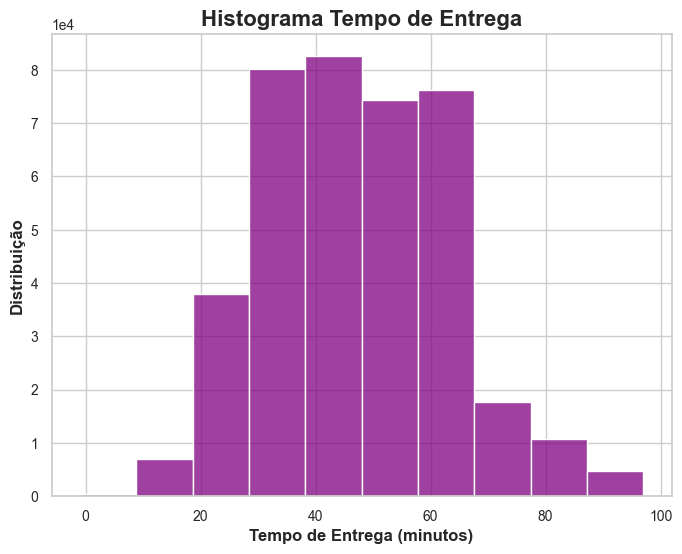

In [33]:
#Histograma Tempo de entrega
sns.histplot(data = df, x = df_sem_out['delivery_time'], bins = 10, color= 'purple')

#Título e eixos 
plt.title('Histograma Tempo de Entrega')
plt.xlabel('Tempo de Entrega (minutos)')
plt.ylabel('Distribuição')

- Pico (Moda): O pico principal da frequência está claramente nas barras entre 30 e 60 unidades de tempo, com um pico específico parecendo estar na faixa de 40-50

- Dispersão: Os dados se estendem de aproximadamente 0 a 100 unidades de tempo. A maior concentração está entre 20 e 80.

Text(0, 0.5, 'Distribuição')

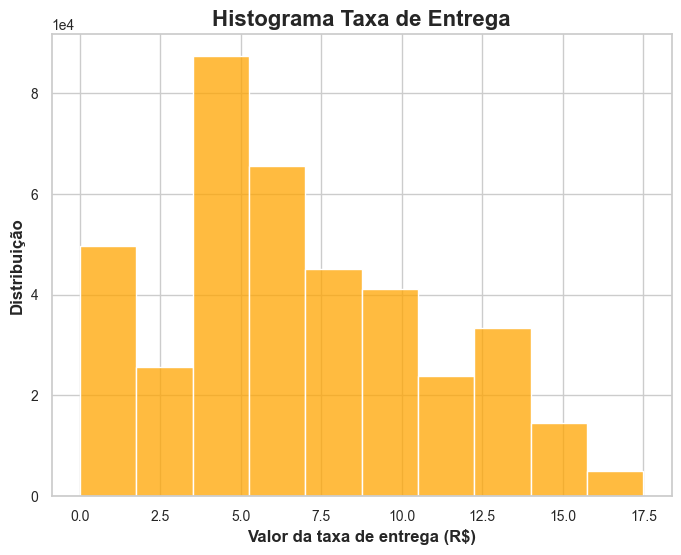

In [34]:
#Histograma Taxa de entrega
sns.histplot(data = df_sem_out, x = df_sem_out['delivery_fee'], bins = 10, color = 'orange')

#Titulos e eixos 
plt.title('Histograma Taxa de Entrega')
plt.xlabel('Valor da taxa de entrega (R$)')
plt.ylabel('Distribuição')

- Picos (Moda): Há um pico proeminente na faixa de 4 a 5 unidades de taxa, com uma frequência muito alta. Há também uma frequência considerável na faixa de 0 a 1 e 5 a 7.
- Dispersão: Os dados se estendem de 0 a aproximadamente 17.5 unidades de taxa. A maior concentração está nos valores mais baixos.

### Variáveis categóricas

In [35]:
#Frequencia de Agendamentos por pedidos e Categorias

cols_to_analyze = ['availableForScheduling', 'category']

for col in cols_to_analyze:
    #Frequência Absoluta
    print(f'Frequência Absoluta de {col}:')
    if col == 'category':
        print(df[col].value_counts().head(5)) # Limita aos 5 maiores para 'category'
    else:
        print(df[col].value_counts()) # Para outras colunas, mostra tudo

  

Frequência Absoluta de availableForScheduling:
availableForScheduling
False    404702
True       1697
Name: count, dtype: int64
Frequência Absoluta de category:
category
Lanches          98946
Brasileira       73348
Doces & Bolos    39828
Pizza            36819
Açaí             22110
Name: count, dtype: int64


In [36]:
#Frequência de Price Range 
cat_cols['price_range'].value_counts(ascending= False)

price_range
CHEAPEST          285899
MODERATE           42642
CHEAP              41935
EXPENSIVE          14194
MOST_EXPENSIVE      7004
Name: count, dtype: int64

Predominança de restaurantes mais baratos (CHEAPEST), seguidos por moderados, baratos, caros, e por ultimo muito caros.

C:\Users\Felipe\AppData\Local\Temp\ipykernel_11208\1910038003.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(top_category, palette= 'plasma')


Text(0, 0.5, 'Distribuição')

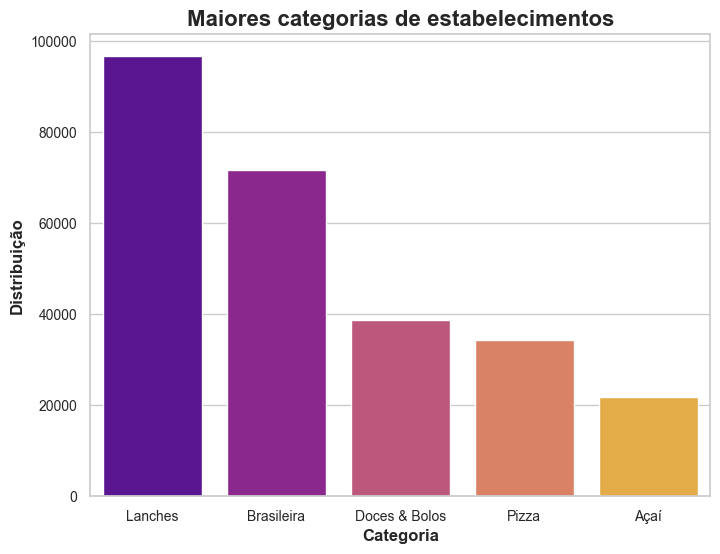

In [37]:
#Criando variável para Category 
top_category = cat_cols['category'].value_counts(ascending= False).head(5)
top_category

#Gráfico de barras 
ax = sns.barplot(top_category, palette= 'plasma')

#Colocando a contagem no eixo y
ax.ticklabel_format(style='plain', axis='y', useOffset=False)

#Título e eixos 
plt.title('Maiores categorias de estabelecimentos')
plt.xlabel('Categoria')
plt.ylabel('Distribuição')


C:\Users\Felipe\AppData\Local\Temp\ipykernel_11208\686750119.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(cat_cols['price_range'].value_counts(ascending= False), palette= 'husl')


Text(0, 0.5, 'Contagem')

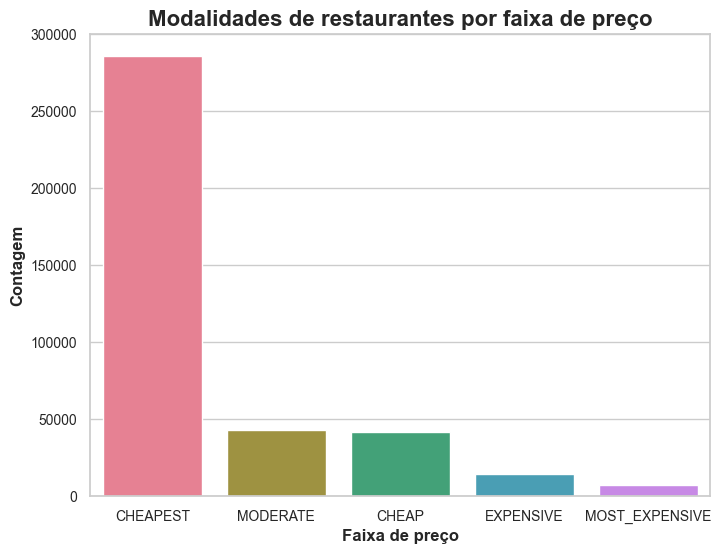

In [38]:
#Gráfico de barras para Price Range 
ax = sns.barplot(cat_cols['price_range'].value_counts(ascending= False), palette= 'husl')
ax.ticklabel_format(style= 'plain', axis= 'y', useOffset= False)

#Título e eixos 
plt.title('Modalidades de restaurantes por faixa de preço')
plt.xlabel('Faixa de preço')
plt.ylabel('Contagem')

# **Análise Bivariada**

- Agora vamos analisar variáveis numéricas e categoricas com outras variáveis em conjunto. 

### **Variáveis numéricas vs numéricas**

### Correlações

In [39]:
#Matriz de correlação 
correlation_matrix = num_cols.corr()
correlation_matrix

,delivery_fee,delivery_time,distance,minimumOrderValue,rating
delivery_fee,1.000000,0.208230,0.724071,0.059945,0.030999
delivery_time,0.208230,1.000000,0.423321,0.025275,-0.138348
distance,0.724071,0.423321,1.000000,0.084524,-0.022032
minimumOrderValue,0.059945,0.025275,0.084524,1.000000,0.047161
rating,0.030999,-0.138348,-0.022032,0.047161,1.000000


<Axes: >

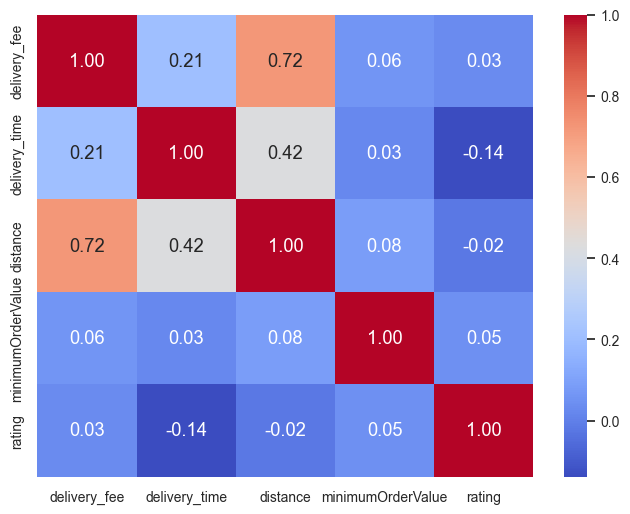

In [40]:
#Heatmap 
sns.heatmap(correlation_matrix, annot= True, cbar=True, cmap= 'coolwarm', linecolor= 'black', fmt= '.2f')

**Análise de correlações importantes:**

- Distancia e taxa de entrega tem 0.72 de coeficiente de correlação, uma correlação alta, o que siginifca que a o valor da taxa de entrega é altamente influenciado pela distancia.
- Distancia e tempo de entrega têm 0.42 de coeficiente de correlação, uma corelação modederada, o que sugere que o tempo de entrega costuma ser maior conforme a distância.

Text(0, 0.5, 'Taxa de Entrega')

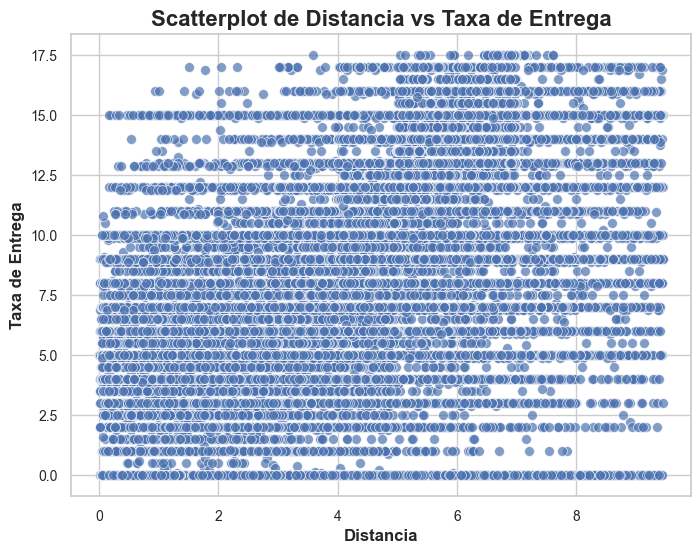

In [41]:
#Scatterplot 
sns.scatterplot(data = df_sem_out, x=df_sem_out['distance'], y= df_sem_out['delivery_fee'], s=50, alpha=0.7)
plt.title('Scatterplot de Distancia vs Taxa de Entrega')
plt.xlabel('Distancia')
plt.ylabel('Taxa de Entrega')

**Analise**:
- O gráfico mostra a relação vista anteriormente, quanto mais a distancia aumenta, mais a taxa de entrega tende a subir também.

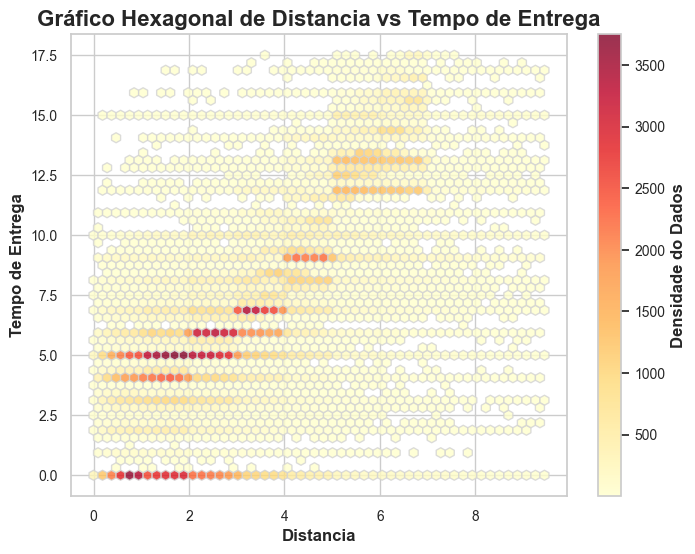

In [42]:
#Compartilhamento hexgonal 
plt.hexbin(df_sem_out['distance'], df_sem_out['delivery_fee'], alpha=0.8, mincnt = 1, gridsize= 50, cmap = 'YlOrRd', edgecolors='lightgrey')
#Títulos e eixos 
plt.title('Gráfico Hexagonal de Distancia vs Tempo de Entrega')
plt.xlabel('Distancia')
plt.ylabel('Tempo de Entrega')
#Barra de cores 
plt.colorbar(label='Densidade do Dados')

**Analise**:
- Há uma alta concentração de entregas em distâncias curtas (0 a 2.5) e tempos de entrega baixos (0 a 5).
- Conforme a distância aumenta, a dispersão do tempo de entrega também parece aumentar. Por exemplo, em distâncias maiores (acima de 5), há hexágonos espalhados por uma gama mais ampla de tempos de entrega.

### **Variáveis categóricas**

In [43]:
#Visualizar as variáveis categoricas
cat_cols.columns

#Removendo availableForScheduling
cat_cols.pop('availableForScheduling')

0         False
1         False
2         False
3         False
4         False
          ...  
406394    False
406395    False
406396    False
406397    False
406398    False
Name: availableForScheduling, Length: 391674, dtype: bool

Vamos excluir a coluna 'availableForScheduling' visto que ela não vai ser usada para análise.

In [44]:
#Analisando maiores categorias 
cat_cols['category'].value_counts().head(10)


category
Lanches          96750
Brasileira       71638
Doces & Bolos    38706
Pizza            34393
Açaí             21824
Marmita          16332
Bebidas          12524
Japonesa         12370
Saudável          9500
Salgados          9423
Name: count, dtype: int64

Vamos selecionar algumas categorias relevantes (Lanches, Brasileira,Doces e bolos, Pizaa,Açaí e Japonesa)

In [45]:
#Selecionando apenas as categorias relevantes no df
df_cat_escolhidas = df[df["category"].isin(["Lanches","Brasileira","Doces & Bolos","Pizza", "Açaí", "Japonesa"])]
df_cat_escolhidas

,availableForScheduling,category,delivery_fee,delivery_time,distance,price_range,minimumOrderValue,rating
1,False,Açaí,7.99,61,4.96,CHEAPEST,10.0,0.00000
4,False,Brasileira,11.99,58,5.22,CHEAPEST,20.0,0.00000
5,False,Lanches,12.99,67,6.77,CHEAP,20.0,0.00000
6,False,Brasileira,11.99,46,4.47,MOST_EXPENSIVE,20.0,0.00000
8,False,Lanches,13.49,41,5.50,MODERATE,20.0,0.00000
...,...,...,...,...,...,...,...,...
406394,False,Açaí,9.00,60,3.53,CHEAPEST,30.0,4.95000
406395,False,Açaí,6.00,50,2.60,CHEAPEST,10.0,0.00000
406396,False,Açaí,0.00,40,3.61,CHEAPEST,0.0,4.46602
406397,False,Lanches,8.00,60,3.54,CHEAPEST,20.0,5.00000


### Tabela de Contingencia

In [46]:
#Criando a tabela de contingencia 
contingency_table = pd.crosstab(df_cat_escolhidas['category'], df_cat_escolhidas['price_range'] )

#Visulizando a categoria com os restaurantes mais caros
contingency_table.sort_values(by='MOST_EXPENSIVE', ascending=False)

price_range,CHEAP,CHEAPEST,EXPENSIVE,MODERATE,MOST_EXPENSIVE
category,,,,,
Japonesa,988,5929,2360,3046,1820
Brasileira,7678,55160,2312,6815,1383
Pizza,4947,17875,3350,9607,1040
Lanches,13234,73025,1969,10191,527
Doces & Bolos,3015,34187,584,1832,210
Açaí,1986,19689,45,371,19


**Insights:**

Lanches como o Carro-Chefe de Versatilidade e Volume: A categoria Lanches demonstra uma presença massiva e consistente em quase todas as faixas de preço, liderando em CHEAPEST (73025), CHEAP (13234), MODERATE (10191) e EXPENSIVE (1969). Isso indica uma grande variedade de ofertas, desde lanchonetes muito acessíveis até opções gourmet mais caras.

Domínio de Japonesa no Segmento MOST_EXPENSIVE: A culinária Japonesa (1820 ocorrências) se posiciona claramente como a principal opção para restaurantes de alto padrão, apesar de ter um volume significativo também em CHEAPEST (5929), mostrando uma dualidade entre o acesso e o luxo.

Brasileira, Doces & Bolos fortes no acessível: As categorias Brasileira (55160) e Doces & Bolos (34187) são particularmente fortes na faixa CHEAPEST, solidificando suas posições como escolhas populares para consumidores que buscam opções de baixo custo. Brasileira também é a segunda mais forte em CHEAP (7678).

Pizza e Açaí com mais volumes no CHEAPEST: Pizza (17875) e Açaí (19689) apresentam sua maior presença na faixa CHEAPEST, sugerindo que o volume principal dessas categorias está em estabelecimentos com propostas de valor mais acessíveis.

In [47]:
#Analisando novamente as maiores predominanças
contingency_table.sum(axis=1).sort_values(ascending=False)

category
Lanches          98946
Brasileira       73348
Doces & Bolos    39828
Pizza            36819
Açaí             22110
Japonesa         14143
dtype: int64

In [48]:
#Proporção (%) de categorias por tipo de estabelecimento
contingency_table.div(contingency_table.sum(axis=1), axis=0)

price_range,CHEAP,CHEAPEST,EXPENSIVE,MODERATE,MOST_EXPENSIVE
category,,,,,
Açaí,0.089824,0.890502,0.002035,0.016780,0.000859
Brasileira,0.104679,0.752031,0.031521,0.092913,0.018855
Doces & Bolos,0.075701,0.858366,0.014663,0.045998,0.005273
Japonesa,0.069858,0.419218,0.166867,0.215372,0.128686
Lanches,0.133750,0.738029,0.019900,0.102996,0.005326
Pizza,0.134360,0.485483,0.090986,0.260925,0.028246


TOP 3 categorias em cada modalidade de preço

**CHEAP** : Pizza, Lanches e Brasileira. 

**CHEAEST** : Açaí, Doces & Bolos, Brasileira.

**MODERATE** : Pizza, Japonesa, Lanches.

**EXPENSIVE** : Japonesa, Pizza, Brasileira.

**MOST_EXPENSIVE** : Japonesa, Pizza, Brasleira.


### Associação das variáveis categoricas com Chi-quadrado e P-value

A função retorna quatro valores:

chi2: O valor da estatística qui-quadrado (χ 
2).

p: O p-valor associado ao teste qui-quadrado.

dof: Os graus de liberdade da tabela de contingência.

expected: Uma tabela de contingência com as frequências esperadas sob a hipótese nula de independência.

Cramer's V. O Cramer's V é uma medida de associação que varia de 0 a 1, onde 0 indica nenhuma associação e 1 indica associação perfeita. Ele é uma versão corrigida do Phi ao quadrado para tabelas maiores que 2x2.

In [49]:

from scipy.stats import chi2_contingency

#Calcular Chi-quadrado e o p-valor
chi2, p, dof, expected = chi2_contingency(contingency_table) 

#Calcular Cramer V
n = contingency_table.sum().sum() #Total de observações
phi2 = chi2 / n  # Phi²
r, k = contingency_table.shape  #número de linhas e colunas
cramer_v = np.sqrt(phi2 / min(k - 1, r - 1))  #Cramer V


print("Tabela de Contingência:")
print(contingency_table)
print("\n")
print(f"Cramer V: {cramer_v:.4f}")

Tabela de Contingência:
price_range    CHEAP  CHEAPEST  EXPENSIVE  MODERATE  MOST_EXPENSIVE
category                                                           
Açaí            1986     19689         45       371              19
Brasileira      7678     55160       2312      6815            1383
Doces & Bolos   3015     34187        584      1832             210
Japonesa         988      5929       2360      3046            1820
Lanches        13234     73025       1969     10191             527
Pizza           4947     17875       3350      9607            1040


Cramer V: 0.1954


Vamos diminuir o número de categorias pra ver se o resultado do nosso Cramer V melhora.

In [51]:
#Selecionar novamente com menos categorias
df_categorias_escolhidas2 = df[df["category"].isin(["Salgados", "Açaí", "Japonesa"])]

#Criar tabela de contingência
contingency_table2 = pd.crosstab(df_categorias_escolhidas2['category'], df_categorias_escolhidas2['price_range'])
contingency_table2

price_range,CHEAP,CHEAPEST,EXPENSIVE,MODERATE,MOST_EXPENSIVE
category,,,,,
Açaí,1986,19689,45,371,19
Japonesa,988,5929,2360,3046,1820
Salgados,1180,7503,128,837,24


In [52]:
#Calcular Chi-quadrado e o p-valor
chi2, p, dof, expected = chi2_contingency(contingency_table2)

# 3. Calcular Cramer V
n = contingency_table2.sum().sum()  # Total de observações
phi2 = chi2 / n  # Phi²
r, k = contingency_table2.shape  # número de linhas e colunas
cramer_v = np.sqrt(phi2 / min(k - 1, r - 1))  # Cramer V

# 4. Imprimir os resultados
print("Tabela de Contingência:")
print(contingency_table2)
print("\n")
print(f"Cramer V: {cramer_v:.4f}")

Tabela de Contingência:
price_range  CHEAP  CHEAPEST  EXPENSIVE  MODERATE  MOST_EXPENSIVE
category                                                         
Açaí          1986     19689         45       371              19
Japonesa       988      5929       2360      3046            1820
Salgados      1180      7503        128       837              24


Cramer V: 0.4056


Análise: 

Podemos ver que ao selecionar menos categorias, nosso valor de Cramer V aumenta significativamente. 

Por que o Cramer's V aumentou ao focar em Açaí, Japonesa e Salgados?


**Tipos de Culinária Inerentemente Mais Associados ao Preço**

- Japonesa: Restaurantes japoneses (especialmente sushi, temaki, etc.) frequentemente se associam a faixas de preço mais moderadas, caras ou de luxo. É menos comum encontrar opções "muito baratas" de qualidade. Esta forte associação contribui significativamente para o aumento do Cramer's V.

- Açaí: Embora possa ter variações, o Açaí tende a ter um preço mais acessível ou moderado, raramente caindo nas categorias "caro" ou "de luxo" (a menos que seja uma experiência gourmet muito específica). Isso cria uma associação clara com as faixas de preço mais baixas/médias.

- Salgados: Salgados (como coxinhas, pão de queijo, esfihas, etc.) são tipicamente associados a opções muito baratas ou baratas, consumidos em lanchonetes, padarias ou estabelecimentos de fast-food de baixo custo.

**Diluição no Conjunto Amplo**

- No primeiro conjunto (Cramer's V = 0.19), você tem culinárias como "Pizza" e "Lanches" que podem abranger um espectro muito amplo de preços (desde uma pizza muito barata de rede até uma pizzaria artesanal cara; desde um lanche de rua a um hambúrguer gourmet). Essa ampla distribuição de preços para essas categorias pode "diluir" a associação geral com a faixa de preço.

- "Brasileira" também é muito vasta, podendo ir de um "prato feito" barato a um churrasco de luxo. "Doces e Bolos" também tem uma variação similar.

- Quando essas categorias com associações de preço mais "difusas" são incluídas, o teste qui-quadrado e o Cramer's V refletem a menor consistência geral na relação entre preço e tipo de culinária para todas as categorias.

**Insigth principal**

Poder preditivo aumentado: O Cramer's V de 0.40 é um insight poderoso para negócios do ramo alimentício. Ele sugere que, se você souber que um cliente tem preferência por Açaí, Japonesa ou Salgados, você terá uma capacidade moderadamente maior de inferir a faixa de preço que ele está disposto a pagar, ou vice-versa.

## Variáveis Numéricas x Categóricas

Questões interessantes para analisarmos:

- Existe diferença entre categorias de restaurantes/alimentos com relação a pedido mínimo?
- E quando comparamos price_range com a taxa de entrega ou tempo de entrega? Existe diferença?
- E o rating dos restaurantes? Existe relação entre rating e price_range?

In [101]:
#Selecionando categorias
categories_to_use = ["Lanches", "Brasileira", "Doces & Bolos", "Pizza", "Açaí"]

#Definindo novo df filtrando somente pelas categorias
df_tmp = df_sem_out[df_sem_out["category"].isin(categories_to_use)]


In [102]:
#Agrupando por categoria pela média de valor mínimo de pedido
mean_cat = df_tmp.groupby("category")["minimumOrderValue"].agg(["mean"]).sort_values(by = 'mean', ascending= False)
mean_cat

,mean
category,
Pizza,17.591943
Brasileira,15.166077
Lanches,14.587576
Doces & Bolos,10.435906
Açaí,10.029079


<Axes: title={'center': 'Média do Pedido Mínimo por Categoria'}, xlabel='Categoria', ylabel='Média do Pedido Mínimo (R$)'>

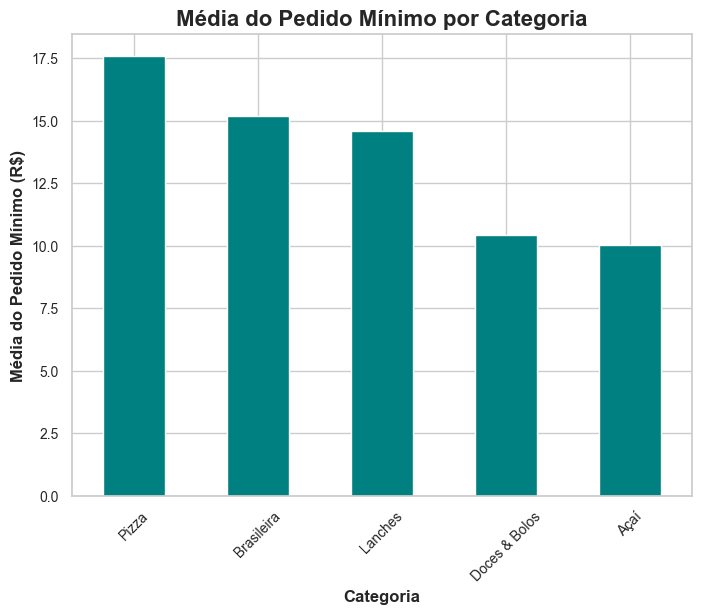

In [ ]:
#Gráfico de barras
mean_cat.plot(kind= 'bar', 
                   color= 'teal', 
                   title = 'Média do Pedido Mínimo por Categoria',
                   xlabel='Categoria', 
                   ylabel='Média do Pedido Mínimo (R$)', 
                   rot=45,
                   legend = False 
                   )


Padrão de Pedido Mínimo: 

- Observamos que "Pizza" e "Brasileira" tendem a ter os pedidos mínimos médios mais altos, seguidos de perto por "Lanches". "Doces & Bolos" e "Açaí" têm os pedidos mínimos médios mais baixos e muito próximos entre si.

In [ ]:
#Desvio padrão
df_tmp.groupby("category")["minimumOrderValue"].agg(["mean", np.std])

C:\Users\Felipe\AppData\Local\Temp\ipykernel_11208\2706945677.py:2: FutureWarning: The provided callable <function std at 0x0000025265004B80> is currently using SeriesGroupBy.std. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "std" instead.
  df_tmp.groupby("category")["minimumOrderValue"].agg(["mean", np.std])


,mean,std
category,,
Açaí,10.029079,4.759467
Brasileira,15.166077,7.061473
Doces & Bolos,10.435906,4.461472
Lanches,14.587576,7.459041
Pizza,17.591943,9.349869


Text(0, 0.5, 'Valor mínimo de pedido')

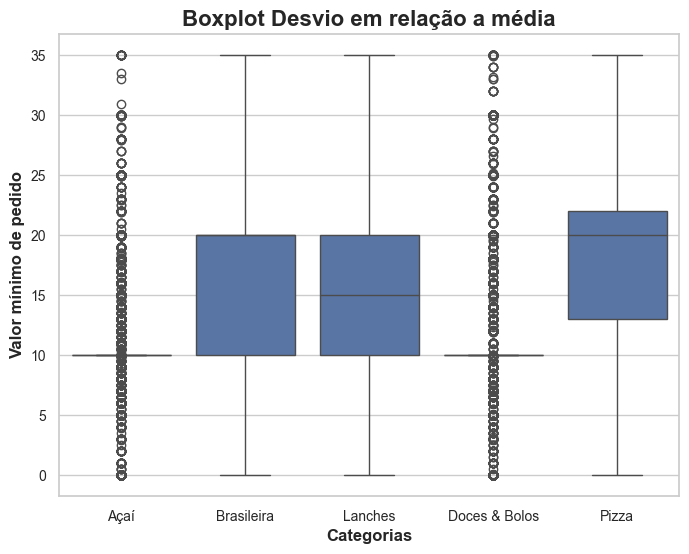

In [107]:
sns.boxplot(df_tmp, x='category', y='minimumOrderValue')

plt.title('Boxplot Desvio em relação a média')
plt.xlabel('Categorias')
plt.ylabel('Valor mínimo de pedido')

Açaí e Doces & Bolos: Baixo Mínimo e Alta Consistência: 

- Essas categorias são caracterizadas por pedidos mínimos médios baixos e, crucialmente, uma baixa variabilidade. A maioria dos estabelecimentos nessas categorias opera com pedidos mínimos muito próximos de R$10. Os outliers indicam que há alguns poucos lugares com mínimos mais altos, possivelmente para produtos diferenciados ou maiores.

- Outliers: como as mesmas não tiveram seus outliers removidos, por conta de não interfirir significamente, podemos ver que eles sugerem que também há restaurantes dessas categorias que tem valores maiores e menores que a média/mediana dos demais restauantes.

Pizza, Lanches e Brasileira: 

- Mínimos Mais Altos e Maior Variabilidade: Estas categorias apresentam pedidos mínimos médios mais elevados e, o mais importante, uma variabilidade substancialmente maior (indicada pelos desvios padrão maiores e caixas mais largas nos boxplots). Isso reflete a diversidade de produtos e modelos de negócio dentro dessas categorias, que podem ir de opções mais econômicas a premium, impactando diretamente o valor mínimo do pedido.

Text(0, 0.5, 'Tempo de entrega')

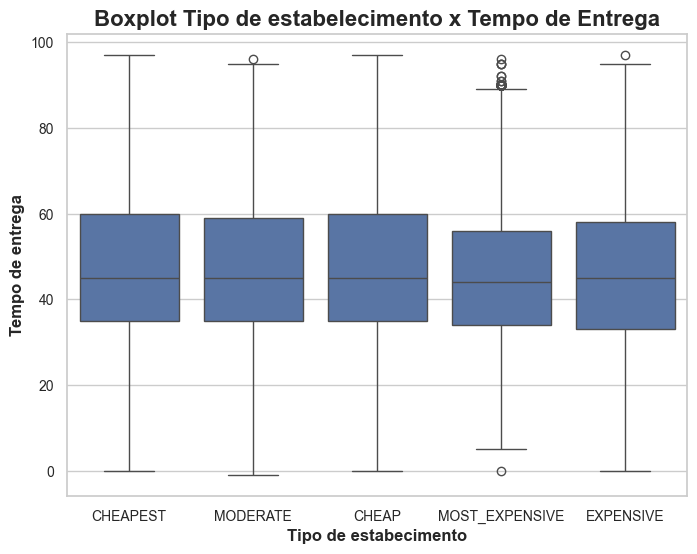

In [ ]:
#Boxplot Price range x Tempo de entrega 
sns.boxplot(x=df_sem_out['price_range'], y=df_sem_out['delivery_time'])
plt.title('Boxplot Tipo de estabelecimento x Tempo de Entrega')
plt.xlabel('Tipo de estabecimento')
plt.ylabel('Tempo de entrega')

**Faixa de Tempo de Entrega:** A maioria dos tempos de entrega parece estar entre 30 e 60 minutos, com alguns outliers se estendendo até quase 100 minutos e outros bem próximos de 0.

Em resumo, podemos ver que a faixa de preço do estabelecimento não é o principal motor das variações no tempo de entrega, com a maioria das categorias exibindo padrões muito semelhantes. No entanto, sugere uma ligeira melhoria na consistência para os estabelecimentos "MOST_EXPENSIVE" e destaca a persistência de tempos de entrega anormalmente longos (outliers) em todas as faixas de preço.

Text(0, 0.5, 'Taxa de entrega')

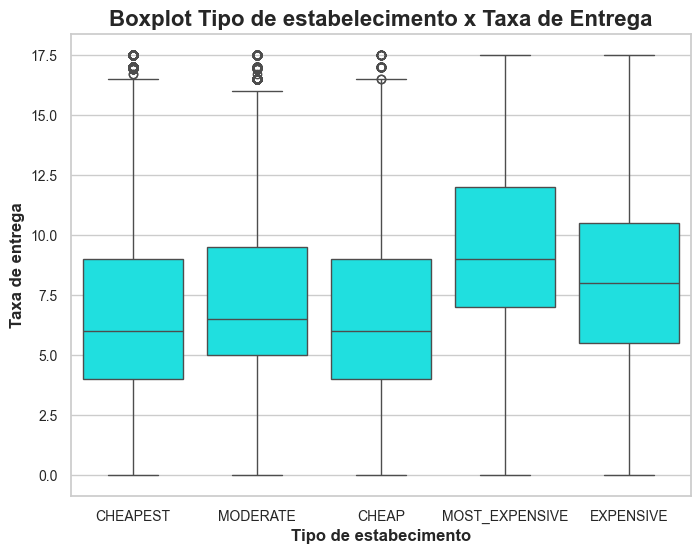

In [121]:
#Boxplot Price range x Tempo de entrega 
sns.boxplot(x=df_sem_out['price_range'], y=df_sem_out['delivery_fee'], color= 'cyan')
plt.title('Boxplot Tipo de estabelecimento x Taxa de Entrega')
plt.xlabel('Tipo de estabecimento')
plt.ylabel('Taxa de entrega')

Grupos distintos: Podemos observar dois grupos claros:

**Baixo/Moderado Custo (CHEAPEST, MODERATE, CHEAP)**: Mediana e IQR das taxas de entrega são mais baixos e muito semelhantes entre si.

**Alto Custo (MOST_EXPENSIVE, EXPENSIVE)**: Mediana e IQR das taxas de entrega são significativamente mais altos.

In [ ]:
#Price range vs média de Tempo entrega
df_sem_out.groupby('price_range')['delivery_time'].agg(['mean']).sort_values(by='mean', ascending=False)

,mean
price_range,
CHEAPEST,46.650156
CHEAP,46.115655
MODERATE,46.003002
MOST_EXPENSIVE,45.372359
EXPENSIVE,45.311963


**Maior tempo de entrega por modalidade de preço:**

Podemos ver a média de tempo de entrega variam muito pouco em relação a cada um.

1) Restaurantes de luxo
2) Restaurantes caros
3) Restaurantes Moderados
4) Muito baratos e baratos por ultimos.

In [114]:
#Price range vs média de Taxa
df_sem_out.groupby('price_range')['delivery_fee'].agg(['mean']).sort_values(by='mean',ascending = False)

,mean
price_range,
MOST_EXPENSIVE,9.394744
EXPENSIVE,8.096070
MODERATE,6.971140
CHEAPEST,6.643133
CHEAP,6.319747


**Maior taxa de entrega:**

Aqui podemos confirmar que existe um pouco mais de diferença em cada tipo de estabelecimento, principalmente entre os mais caros em relação aos outros.

1) Restaurantes de luxo
2) Restaurantes caros 
3) Moderados
4) Muito baratos e baratos finalizam novamente